In [12]:
import tensorflow as tf
import numpy as np
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

import warnings


In [13]:
warnings.filterwarnings('ignore')

In [14]:
dir = "/Users/kosw/Downloads/dataset/"

In [15]:
BATCH, IMG_SIZE, SEED = 32, (224,224), 42  # Assing custom  batch_size, img_size, seed

# Spliting dataset into training and testing data in batches
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dir,
                                                              batch_size = BATCH, 
                                                              image_size = IMG_SIZE, 
                                                              shuffle = True,
                                                              validation_split = .2, 
                                                              subset = 'training',
                                                              seed = SEED)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(dir,
                                                              batch_size = BATCH, 
                                                              image_size = IMG_SIZE, 
                                                              shuffle = True,
                                                              validation_split = .2, 
                                                              subset = 'validation',
                                                              seed = SEED)

Found 197 files belonging to 2 classes.
Using 158 files for training.
Found 197 files belonging to 2 classes.
Using 39 files for validation.


In [16]:
classes = train_ds.class_names
classes

['코르크 마개', '키보드']

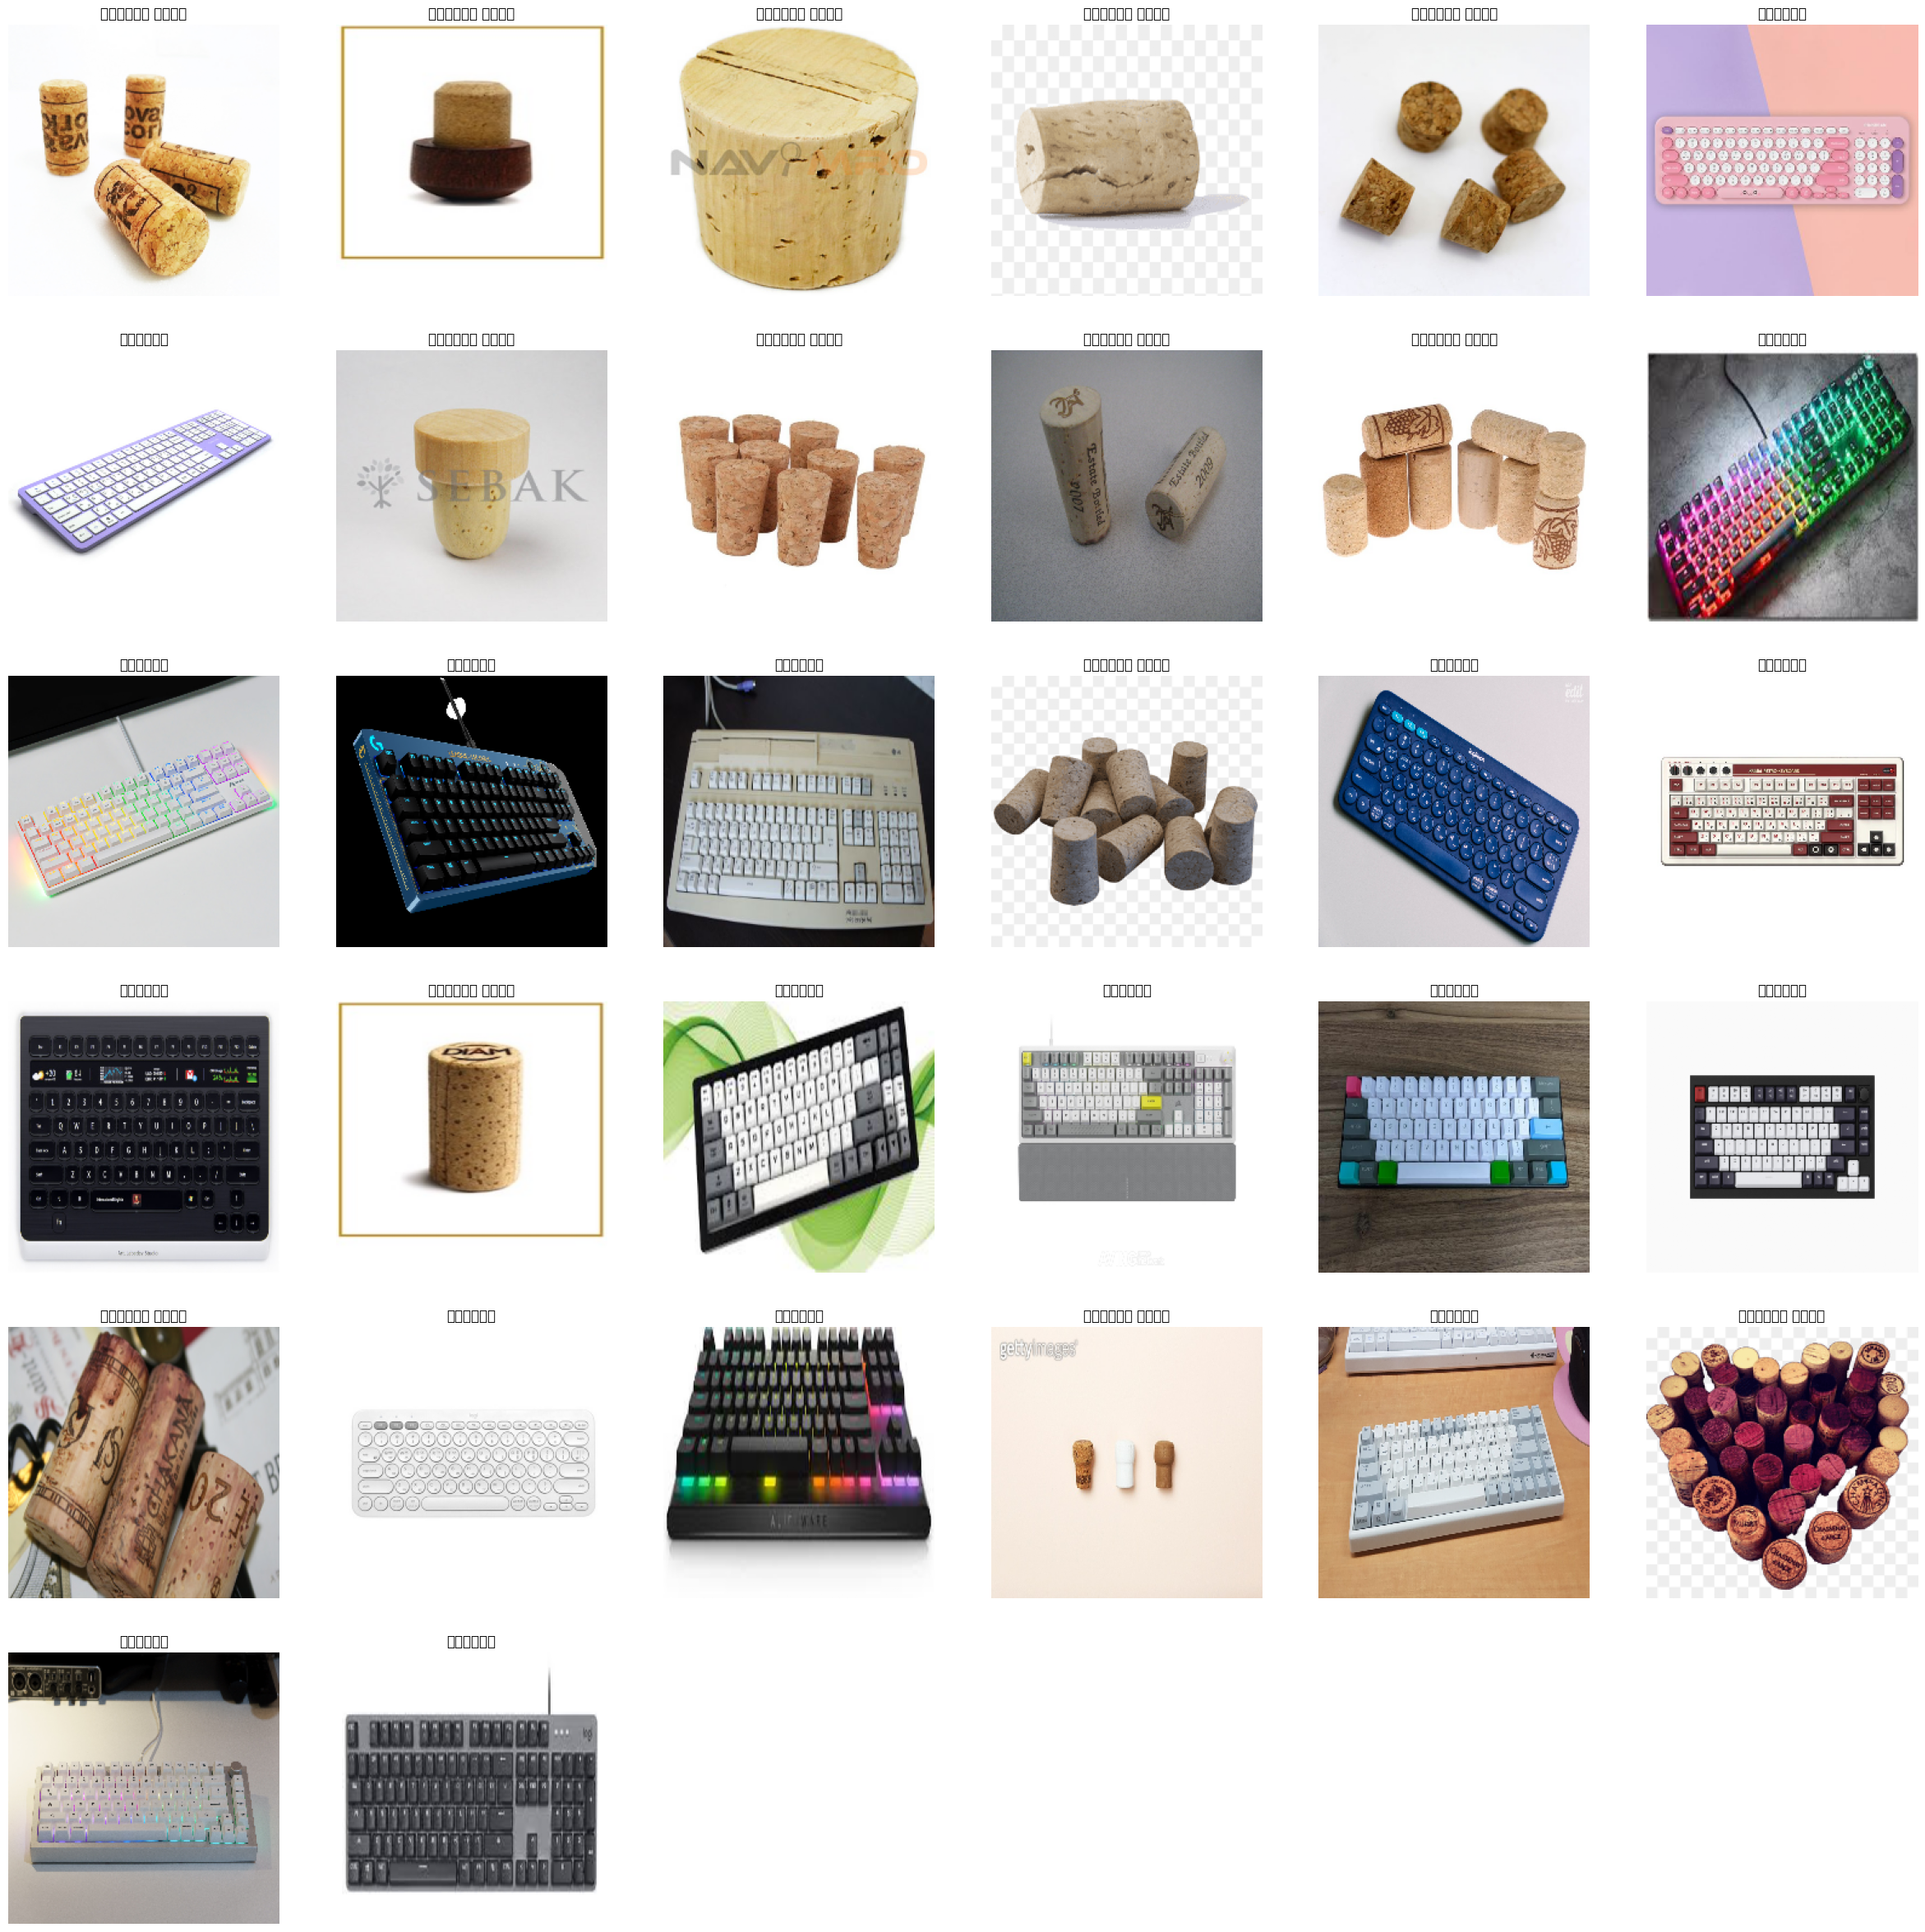

In [17]:
for image, label in train_ds.take(1):
    plt.figure(figsize = (30, 30))
    for i in range(32):
        plt.subplot(6, 6, i+1)
        plt.imshow(image[i]/255.)
        plt.axis('off')
        plt.title(classes[label[i]])
    plt.show()

In [18]:
CLASS_NUMBER=2

app=tf.keras.applications.EfficientNetV2S(include_top=False, input_shape=(224,224,3), weights="imagenet")

x=app.output
x=tf.keras.layers.Conv2D(1280,1,1,activation="ReLU")(x)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(CLASS_NUMBER, activation='softmax')(x)

model=tf.keras.Model(app.input, x)


In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 24  648         ['rescaling_1[0][0]']            
                                )                                                                 
                                                                                            

In [20]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [21]:
hist = model.fit(train_ds, epochs = 10, verbose = 1, validation_data=validation_ds)

Epoch 1/10


5/5 [==============================] - 337s 49s/step - loss: 0.2220 - accuracy: 0.8924 - val_loss: 8.2893e-05 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 24s 5s/step - loss: 0.0730 - accuracy: 0.9747 - val_loss: 3.3012e-07 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 15s 3s/step - loss: 0.2389 - accuracy: 0.9430 - val_loss: 1.2838e-07 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 11s 2s/step - loss: 0.1763 - accuracy: 0.9304 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 14s 2s/step - loss: 0.0293 - accuracy: 0.9873 - val_loss: 1.5589e-07 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 9s 2s/step - loss: 0.1161 - accuracy: 0.9747 - val_loss: 8.7380e-05 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 5s 838ms/step - loss: 0.2133 - accuracy: 0.9684 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 8/10
5/5 [==

In [22]:
model.save('trash.h5')